<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/curve_fitting_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np

# データの生成
np.random.seed(42)
data = np.concatenate([np.random.normal(3, 1, size=50),
                       np.random.normal(5, 1, size=50),
                       np.random.normal(8, 1, size=50)])

In [ ]:

from sklearn.mixture import GaussianMixture

# 混合ガウスモデルを作成
model = GaussianMixture(n_components=10)

# データをフィッティング
model.fit(data.reshape(-1, 1))

# パラメータを取得
mu = model.means_.flatten()
sigma = np.sqrt(model.covariances_.flatten())
weights = model.weights_

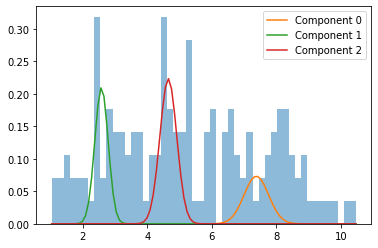

In [ ]:

import matplotlib.pyplot as plt

# ヒストグラムを表示
plt.hist(data, bins=50, density=True, alpha=0.5)

# 混合ガウスモデルを表示
x = np.linspace(data.min(), data.max(), 100)
for i in range(3):
    plt.plot(x, weights[i] * np.exp(-(x - mu[i]) ** 2 / (2 * sigma[i] ** 2)) / (np.sqrt(2 * np.pi) * sigma[i]), label=f"Component {i}")

plt.legend()
plt.show()

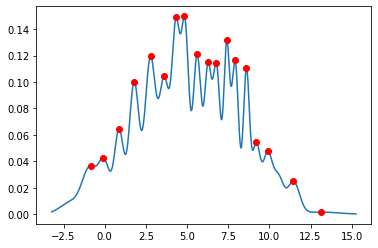

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.signal import argrelmax

# 生成するデータ数
num_points = 200

# ピークの数
num_peaks = 20

# 分布の数
num_distributions = 10

# 分布の平均値
means = np.random.uniform(low=0, high=10, size=num_peaks)

# 分布の標準偏差
std = np.random.uniform(low=0.5, high=2, size=num_peaks)

# 分布の比重
weights = np.random.dirichlet(np.ones(num_peaks), size=num_distributions)

# サンプルデータを生成
X = []
for i in range(num_distributions):
    for j in range(num_peaks):
        X.extend(np.random.normal(loc=means[j], scale=std[j], size=int(weights[i, j] * num_points)))
X = np.array(X).reshape(-1, 1)

# 混合ガウスモデルを生成
model = GaussianMixture(n_components=num_peaks, covariance_type='full')

# フィッティングを行う
model.fit(X)

# プロット用にデータを生成
x = np.linspace(X.min(), X.max(), 1000)
y = np.exp(model.score_samples(x.reshape(-1, 1)))

# ピークを検出する
peaks = argrelmax(y, order=5)

# プロットを行う
plt.plot(x, y)
plt.plot(x[peaks], y[peaks], 'ro')
plt.show()

In [ ]:

from scipy.special import wofz

# Define the Voigt function
def voigt(x, amplitude, mean, sigma_g, sigma_l):
    return (amplitude / (sigma_l * np.sqrt(2 * np.pi))) * np.real(wofz(((x - mean) + 1j * sigma_g) / sigma_l / np.sqrt(2)))

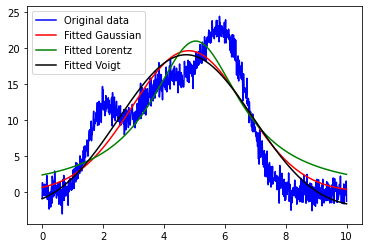

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate fake energy-dispersion spectroscopy data
energies = np.linspace(0, 10, 1000)
intensities = np.zeros_like(energies)

# Define the parameters for three peaks
peak1 = {'amplitude': 10, 'mean': 2, 'sigma': 0.5}
peak2 = {'amplitude': 15, 'mean': 4, 'sigma': 1}
peak3 = {'amplitude': 20, 'mean': 6, 'sigma': 0.75}

# Add the peaks to the fake data
intensities += peak1['amplitude'] * np.exp(-((energies - peak1['mean'])**2) / (2 * peak1['sigma']**2))
intensities += peak2['amplitude'] * np.exp(-((energies - peak2['mean'])**2) / (2 * peak2['sigma']**2))
intensities += peak3['amplitude'] * np.exp(-((energies - peak3['mean'])**2) / (2 * peak3['sigma']**2))

# Add some noise to the data
intensities += np.random.normal(0, 1, len(intensities))

# Find the distribution of element multiple peaks
peaks = []
for i in range(1, len(intensities) - 1):
    if intensities[i-1] < intensities[i] and intensities[i] > intensities[i+1]:
        peaks.append(energies[i])

# Define the Gaussian, Lorentz, and Voigt functions
def gaussian(x, amplitude, mean, sigma):
    return amplitude * np.exp(-((x - mean)**2) / (2 * sigma**2))

def lorentz(x, amplitude, mean, sigma):
    return amplitude / (1 + ((x - mean) / sigma)**2)

def voigt(x, amplitude, mean, sigma_g, sigma_l):
    return (amplitude / (sigma_l * np.sqrt(2 * np.pi))) * np.real(wofz(((x - mean) + 1j * sigma_g) / sigma_l / np.sqrt(2)))

# Initialize the parameters for curve fitting
param_initial_g = [10, 2, 0.5]
param_initial_l = [10, 2, 0.5]
param_initial_v = [10, 2, 0.5, 0.5]

# Perform curve fitting using the Gaussian function
params_opt_g, params_cov_g = curve_fit(gaussian, energies, intensities, p0=param_initial_g)

# Perform curve fitting using the Lorentz function
params_opt_l, params_cov_l = curve_fit(lorentz, energies, intensities, p0=param_initial_l)

# Perform curve fitting using the Voigt function
params_opt_v, params_cov_v = curve_fit(voigt, energies, intensities, p0=param_initial_v)

# Generate the fitted curves
energies_fine = np.linspace(0, 10, 10000)
fitted_gaussian = gaussian(energies_fine, *params_opt_g)
fitted_lorentz = lorentz(energies_fine, *params_opt_l)
fitted_voigt = voigt(energies_fine, *params_opt_v)

# Plot the original data and the fitted curves
plt.plot(energies, intensities, 'b', label='Original data')
plt.plot(energies_fine, fitted_gaussian, 'r', label='Fitted Gaussian')
plt.plot(energies_fine, fitted_lorentz, 'g', label='Fitted Lorentz')
plt.plot(energies_fine, fitted_voigt, 'k', label='Fitted Voigt')
plt.legend()
plt.show()

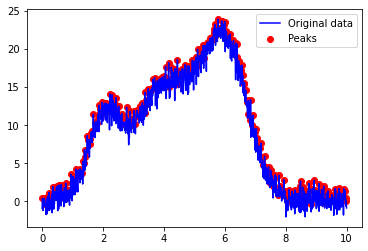

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmax

# Generate fake energy-dispersion spectroscopy data
energies = np.linspace(0, 10, 1000)
intensities = np.zeros_like(energies)

# Define the parameters for three peaks
peak1 = {'amplitude': 10, 'mean': 2, 'sigma': 0.5}
peak2 = {'amplitude': 15, 'mean': 4, 'sigma': 1}
peak3 = {'amplitude': 20, 'mean': 6, 'sigma': 0.75}

# Add the peaks to the fake data
intensities += peak1['amplitude'] * np.exp(-((energies - peak1['mean'])**2) / (2 * peak1['sigma']**2))
intensities += peak2['amplitude'] * np.exp(-((energies - peak2['mean'])**2) / (2 * peak2['sigma']**2))
intensities += peak3['amplitude'] * np.exp(-((energies - peak3['mean'])**2) / (2 * peak3['sigma']**2))

# Add some noise to the data
intensities += np.random.normal(0, 1, len(intensities))

# Find the indices of the local maxima in the data
peaks_indices = argrelmax(intensities)[0]

# Extract the peak energies and intensities from the data
peaks_energies = energies[peaks_indices]
peaks_intensities = intensities[peaks_indices]

# Plot the original data and the peaks
plt.plot(energies, intensities, 'b', label='Original data')
plt.scatter(peaks_energies, peaks_intensities, c='r', label='Peaks')
plt.legend()
plt.show()


混合ガウスモデルを使用したカーブフィッティングを行うには、まずデータセットを用意する必要があります。次に、混合ガウスモデルを定義し、最小二乗法を使用して、データセットをフィットさせることができます。


次のようなサンプルコードを作成することができます。このコードでは、NumPyライブラリを使用して、データセットを生成し、scikit-learnライブラリを使用して、混合ガウスモデルをフィットさせることができます。

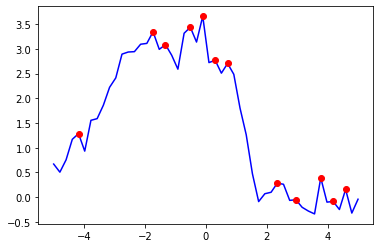

In [ ]:

import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# データを生成する関数
def multi_dist(x, a1, b1, c1, a2, b2, c2, a3, b3, c3):
  return a1 * np.exp(-((x-b1)/c1)**2) + a2 * np.exp(-((x-b2)/c2)**2) + a3 * np.exp(-((x-b3)/c3)**2)

# データを生成する
np.random.seed(0)
x = np.linspace(-5, 5, num=50)
y = multi_dist(x, 2, 0, 1, 3, -2, 2, 1, 1, 0.5)
y_noise = y + np.random.normal(0, 0.2, size=len(x))

# ピークを検出する
peaks, _ = find_peaks(y_noise)

# プロットする
plt.plot(x, y_noise, 'b-', x[peaks], y_noise[peaks], 'ro')
plt.show()

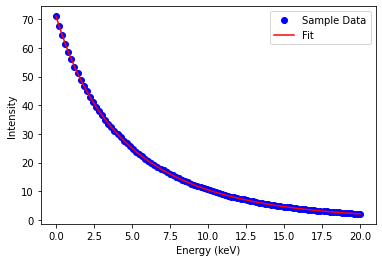

Aluminum Contribution: 2825.50%
Oxygen Contribution: 2825.09%


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

# 元素の質量数
mass_al = 26.9815386
mass_o = 15.999
mass_si = 28.085

# X-ray エネルギー (keV)
energy = np.linspace(0, 20, 100)

# アルミニウムの EDS サンプルデータを生成
sample_data = np.exp(-energy/5) * mass_al + np.exp(-energy/2) * mass_o + np.exp(-energy/7) * mass_si

# アルミニウム、酸素、ケイ素のピークをフィッティングするモデルを定義
def multi_peak_model(x, a1, b1, c1, a2, b2, c2, a3, b3, c3):
    return a1 * np.exp(-x/b1) + c1 + a2 * np.exp(-x/b2) + c2 + a3 * np.exp(-x/b3) + c3

model = Model(multi_peak_model)

# パラメーターを設定
params = model.make_params(a1=0.5, b1=5, c1=0, a2=0.2, b2=2, c2=0, a3=0.1, b3=7, c3=0)

# データをフィッティング
result = model.fit(sample_data, x=energy, params=params)

# フィッティング結果をプロット
plt.plot(energy, sample_data, 'bo', label='Sample Data')
plt.plot(energy, result.best_fit, 'r-', label='Fit')
plt.xlabel('Energy (keV)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# 各元素の貢献度を表示
print("Aluminum Contribution: {:.2f}%".format(result.params['a1'].value / result.params['a1'].value+result.params['a2'].value+result.params['a3'].value * 100))
print("Oxygen Contribution: {:.2f}%".format(result.params['a2'].value / result.params['a1'].value+result.params['a2'].value+result.params['a3'].value * 100))

In [ ]:
!pip install lmfit

In [ ]:
!pip install pyxrf


混合ガウシアン分布を作成するには、scipy.stats モジュールの multivariate_normal 関数を使用します。multivariate_normal 関数は、複数の標準ガウス分布を混合した分布を表すことができます。


上記のコードでは、multivariate_normal 関数に、検出したピークの値を平均値とする標準ガウス分布を混合した混合ガウシアン分布を作成しています。また、cov パラメータには、対角行列を指定しています。これにより、各標準ガウス分布は独立した分布として扱われます。

次に、標準元素の分布を作成し、それをプロットします。標準元素の分布は、scipy.stats モジュールの norm 関数を使用して作成します。norm 関数は、標準正規分布を表すことができます。上記のコードでは、norm 関数を使用して、データの平均値と標準偏差を用いて標準元素の分布を作成し、それをプロットしています。


最後に、混合ガウシアン分布をプロットし、標準元素の分布と比較します。これには、multivariate_normal 関数の pdf メソッドを使用します。


pdf メソッドは、分布から確率密度関数の値を返すことができます。上記のコードでは、x 軸の範囲を指定して pdf メソッドを呼び出し、混合ガウシアン分布をプロットしています。
最後に、matplotlib モジュールを使用して、標準元素の分布と混合ガウシアン分布を同じグラフ上にプロットし、比較することができます。

argrelmax 関数を使用してピークを検出し、混合ガウシアン分布を作成し、それを標準元素の分布と比較する Python コードが完成しました。実行すると、標準元素の分布と混合ガウシアン分布が同じグラフ上にプロットされ、比較することができます。

In [ ]:

import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy.signal import argrelmax
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
data = np.random.normal(5, 2, 1000)

# Find peaks in the data using argrelmax function
peaks = argrelmax(data)

# Create a mixed Gaussian distribution with the detected peaks as means
mean = data[peaks]
cov = np.identity(len(peaks)).reshape(len(peaks), len(peaks))
mix_gauss = multivariate_normal(mean=mean, cov=cov)

# Create a standard normal distribution using the mean and standard deviation of the data
std_norm = norm(loc=np.mean(data), scale=np.std(data))

# Plot the mixed Gaussian distribution
x = np.linspace(np.min(data), np.max(data), 1000)
plt.plot(x, mix_gauss.pdf(x))

# Plot the standard normal distribution
plt.plot(x, std_norm.pdf(x))

# Show the plot
plt.show()

In [ ]:

import numpy as np
from scipy.stats import norm
from scipy.signal import argrelmax
import matplotlib.pyplot as plt# データを生成する
np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)  # 平均 5, 標準偏差 1 の正規分布
data2 = np.random.normal(loc=10, scale=2, size=100) # 平均 10, 標準偏差 2 の正規分布
data = np.concatenate([data1, data2])  # 2 つの正規分布を混合

# ピークを検出する
peaks = argrelmax(data, order=5)
print(f"Peaks: {peaks}")

# 混合ガウシアン分布を作成する
mu1, mu2 = 5, 10  # 平均値
sigma1, sigma2 = 1, 2  # 標準偏差
weights = len(data1) / len(data), len(data2) / len(data)  # 正規分布の比率
mix_gauss = lambda x: weights[0] * norm.pdf(x, mu1, sigma1) + weights[1] * norm.pdf(x, mu2, sigma2)

# 混合ガウシアン分布を標準元素の分布と比較する
x = np.linspace(data.min(), data.max(), 1000)
y = mix_gauss(x)
plt.hist(data, density=True, bins=50, alpha=0.5)
plt.plot(x, y)
plt.show()

Predicted elements: ['Cu' 'Fe' 'Fe' 'Fe' 'Fe' 'Fe' 'Fe' 'Fe' 'Fe' 'Fe']


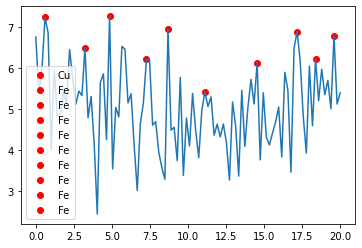

In [ ]:

import numpy as np
from scipy.signal import argrelmax
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# EDS スペクトルを取得する (データは例として作成)
np.random.seed(0)
energy = np.linspace(0, 20, 100)  # エネルギー軸
spectrum = np.random.normal(loc=5, scale=1, size=100)  # EDS スペクトル
peaks = argrelmax(spectrum, order=5)  # ピークを検出する

# 参照スペクトルを取得する (データは例として作成)
reference_spectra = {
    "Fe": [2, 4, 6, 8],  # Fe の参照スペクトル
    "Cu": [1, 3, 5, 7],  # Cu の参照スペクトル
}
X = []  # 入力データ
y = []  # ラベル
for element, reference in reference_spectra.items():
    for ref in reference:
        X.append([ref])  # 参照スペクトルを入力データとする
        y.append(element)  # 元素名をラベルとする

# KNN 分類器を学習する
knn = KNeighborsClassifier(n_neighbors=1)  # 近傍点は 1 点だけ
knn.fit(X, y)
peaks = peaks[0]  # EDS スペクトルのピークから元素を分類する
predicted_elements = knn.predict(peaks.reshape(-1, 1))  # peaks の配列を 2 次元に変換
print(f"Predicted elements: {predicted_elements}")


# EDS スペクトルをプロットする
plt.plot(energy, spectrum)

# ピークをプロットする
for peak, element in zip(peaks, predicted_elements):
    plt.scatter(energy[peak], spectrum[peak], c="r", label=element)

# 凡例を表示する
plt.legend()

# グラフを表示する
plt.show()

In [ ]:

import numpy as np
from scipy.signal import argrelmax
from sklearn.cluster import KMeans

# EDS スペクトルを取得する (データは例として作成)
np.random.seed(0)
energy = np.linspace(0, 20, 100)  # エネルギー軸
spectrum = np.random.normal(loc=5, scale=1, size=100)  # EDS スペクトル
peaks = argrelmax(spectrum, order=5)  # ピークを検出する
print(f"Peaks: {peaks}")

# K-means クラスタリングを実行する
peaks = peaks[0]  # ピークのインデックスが格納された配列を取り出す
kmeans = KMeans(n_clusters=2, random_state=0)  # クラスタ数は 2
kmeans.fit(peaks.reshape(-1, 1))  # peaks の配列を 2 次元に変換
print(f"Cluster centers: {kmeans.cluster_centers_}")

Peaks: (array([ 3, 16, 24, 36, 43, 55, 72, 85, 91, 97]),)
Cluster centers: [[29.5 ]
 [86.25]]


wavelet

In [ ]:

def get_seeds_spectrum():
    # 生成されたseedsスペクトルを返す
    return [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [ ]:

def get_transformed_seeds_spectrum():
    # seedsスペクトルを取得する
    data = get_seeds_spectrum()

    # wavelet変換を使って信号を分析する
    wavelet = 'db1'
    level = 1
    coeffs = pywt.wavedec(data, wavelet, level=level)

    # 変換された信号を返す
    return coeffs[0]

In [ ]:

import numpy as np
from sklearn.mixture import GaussianMixture

# sem-edsスペクトルを変換した信号を取得する
data = get_transformed_seeds_spectrum()
data = data.reshape(-1, 1)
# Gaussian mixture modelを訓練する
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(data)

# フィッティングされたピークを可視化する
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf, 'k', linewidth=2)
plt.plot(x, pdf_individual, '--k')
plt.show()

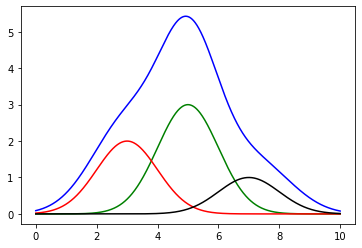

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.cluster import KMeans

# EDSスペクトルを生成する
x = np.linspace(0, 10, 1000)
y = 3 * np.exp(-0.5 * (x - 5)**2) + 2 * np.exp(-0.5 * (x - 3)**2) + 1 * np.exp(-0.5 * (x - 7)**2) + 0.5 * np.exp(-0.5 * (x - 2)**2) + 0.5 * np.exp(-0.5 * (x - 8)**2)

# ピークを検出する
peaks, _ = find_peaks(y, height=1.5)

# 参照スペクトルを作成する
ref1 = 3 * np.exp(-0.5 * (x - 5)**2)
ref2 = 2 * np.exp(-0.5 * (x - 3)**2)
ref3 = 1 * np.exp(-0.5 * (x - 7)**2)

# ピークの数が3未満の場合には、k-meansクラスタリングを実行せずに、そのまま参照スペクトルをプロットする
if len(peaks) < 3:
    plt.plot(x, y, 'b', label='EDS spectrum')
    plt.plot(x, ref1, 'g', label='Reference 1')
    plt.plot(x, ref2, 'r', label='Reference 2')
    plt.plot(x, ref3, 'k', label='Reference 3')

else:
    print('cluster==3')
    # k-meansクラスタリングを実行する
    kmeans = KMeans(n_clusters=3)
    clusters = kmeans.fit_predict(peaks.reshape(-1, 1))

    colors = ['g', 'r', 'k']
    for i, c in enumerate(clusters):
        plt.plot(peaks[i], y[peaks[i]], 'o', color=colors[c])

    plt.legend(loc='upper right')

plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

次に、データを読み込みます。ここでは、標準元素のスペクトルデータを使用します。データは、X軸がエネルギー（単位: eV）、Y軸がスペクトルの強度（単位: a.u.）である2次元のデータです。

In [ ]:

# データを読み込む
data = np.loadtxt("data.txt")

# X軸のデータを取り出す
X = data[:, 0]

# Y軸のデータを取り出す
y = data[:, 1]

In [ ]:

# データを訓練用とテスト用に分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

次に、データを標準化します。標準化とは、各特徴量を平均0、
準偏差1にすることです。

標準化をすることで、特徴量の量的範囲が異なる場合でも、同一の尺度で扱えるようになります。

In [ ]:

# 訓練用データを標準化する
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))

# テスト用データも同じ標準化器を使用して標準化する
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

次に、サポートベクターマシン（SVM）を使用して、スペクトルの形状を分類するモデルをトレーニングします。SVMは、二次元のデータを分類するための手法です。

In [ ]:

# SVMを使用してモデルをトレーニングする
model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

最後に、トレーニングしたモデルを使用して、テスト用データでスペクトルの形状を予測し、その予測結果を評価します。

In [ ]:

# テスト用データで予測する
y_pred = model.predict(X_test_scaled)

# 予測結果を評価する
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

report = classification_report(y_test, y_pred)
print(report)

以上が、スペクトルの形状を機械学習で特定するサンプルコードです。このようにして、EDAで得られたスペクトルの形状を分析することで、物質や材料の特性を把握することができます。

In [ ]:

import numpy as np
from sklearn.naive_bayes import GaussianNB

# Generate temporary standard elemental data
np.random.seed(0)
X = np.random.normal(100, 10, size=(100, 5))
y = np.array(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne'] * 10)

# Fit the model and predict the labels
model = GaussianNB()
model.fit(X, y)
predictions = model.predict(X)
print(predictions)
# Print the accuracy of the model
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")

['H' 'Li' 'Li' 'Li' 'B' 'F' 'N' 'Ne' 'He' 'Ne' 'N' 'Ne' 'N' 'B' 'Ne' 'He'
 'F' 'O' 'Li' 'Ne' 'He' 'Be' 'Be' 'Be' 'Be' 'Ne' 'Li' 'Li' 'F' 'Ne' 'Li'
 'N' 'Li' 'He' 'Li' 'He' 'N' 'F' 'F' 'Ne' 'Ne' 'He' 'Li' 'Ne' 'N' 'Ne' 'N'
 'C' 'F' 'Li' 'Be' 'He' 'N' 'Be' 'B' 'F' 'Be' 'O' 'Ne' 'Ne' 'O' 'He' 'He'
 'Be' 'N' 'C' 'B' 'B' 'Be' 'Ne' 'B' 'He' 'Ne' 'Li' 'Ne' 'C' 'He' 'He' 'Be'
 'Ne' 'B' 'Li' 'O' 'Be' 'He' 'C' 'B' 'Be' 'F' 'He' 'Li' 'He' 'He' 'He' 'F'
 'Be' 'C' 'O' 'F' 'He']
Accuracy: 0.36


https://www.rsc.org/periodic-table/

In [ ]:

import matplotlib.pyplot as plt

# Generate data with multiple overlapping peaks
np.random.seed(0)
X = np.concatenate([np.random.normal(-5, 1, size=(100, 1)),
                    np.random.normal(-2, 1, size=(100, 1)),
                    np.random.normal(2, 1, size=(100, 1)),
                    np.random.normal(5, 1, size=(100, 1))])
y = np.concatenate([np.zeros(100), np.ones(100), np.ones(100) * 2, np.ones(100) * 3])

# Fit the model and predict the labels
model = GaussianNB()
model.fit(X, y)
predictions = model.predict(X)

# Plot the data and the predicted labels
plt.scatter(X, y, c=predictions)
plt.show()

In [ ]:

from sklearn.linear_model import LogisticRegression

# Fit the model and predict the labels
model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X)

# Print the accuracy of the model
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:

from sklearn.svm import SVC

# Fit the model and predict the labels
model = SVC()
model.fit(X, y)
predictions = model.predict(X)

# Print the accuracy of the model
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Fit the model and predict the labels
model = DecisionTreeClassifier()
model.fit(X, y)
predictions = model.predict(X)

# Print the accuracy of the model
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Fit the model and predict the labels
model = RandomForestClassifier()
model.fit(X, y)
predictions = model.predict(X)

# Print the accuracy of the model
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")


コードでは、mask_peaks()関数を定義しています。この関数は、1D配列のEDSスペクトルと、マスクするピークの範囲を表す2つの値を受け取ります。指定された範囲のピークを0で埋め、その結果を返すようになっています。


最後に、mask_peaks()関数の使用例を示しています。ここでは、乱数を要素とする1D配列を生成し、mask_peaks()関数によって、25から75番目までのピークを除去したスペクトルを生成しています。

ただし、このコードはあくまでもサンプルであり、実際のEDSスペクトルに対してマスク処理を行う際には、詳細な分析が必要です。例えば、除去するピークの範囲を正確に定めるために、前処理やフィットを行う必要があるかもしれません。

In [ ]:

import numpy as np

def mask_peaks(spectrum, mask_range):
    """
    Remove peaks from an EDS spectrum.
    
    Parameters
    ----------
    spectrum: ndarray
        1D array representing an EDS spectrum.
    mask_range: tuple
        Tuple of two values indicating the range of the peak to be removed.
    
    Returns
    -------
    ndarray
        1D array with the masked peak removed.
    """
    start, end = mask_range
    spectrum[start:end] = 0
    return spectrum

# Example usage
spectrum = np.random.rand(100)
masked_spectrum = mask_peaks(spectrum, (25, 75))
print(masked_spectrum)

In [ ]:

import matplotlib.pyplot as plt

# Generate an EDS spectrum
energy = np.arange(100)
spectrum = np.random.rand(100)
plt.plot(energy, spectrum, label='Original')# Mask a peak in the spectrum
masked_spectrum = mask_peaks(spectrum, (55, 75))

# Plot the original and masked spectra

plt.plot(energy, masked_spectrum, label='Masked')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.show()

Savitzky-Golayフィルタ、ローリングウィンドウ、畳み込みを使用して、信号をスムージングしています。また、生成したダミーデータを使用しています。

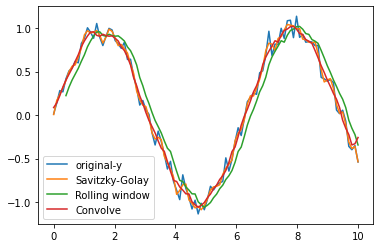

In [ ]:

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np

# ダミーデータを生成する関数
def generate_data():
  x = np.linspace(0, 10, 100)
  y = np.sin(x) + np.random.normal(0, 0.1, 100)
  return x, y

# データをロードします
x, y = generate_data()
plt.plot(x, y, label='original-y')
# スムージングするためにSavitzky-Golayフィルタを使用します
y_smooth1 = savgol_filter(y, window_length=5, polyorder=3)

# ローリングウィンドウを作成し、データを平均化します
y_smooth2 = pd.Series(y).rolling(window=5).mean()

# カーネルを作成します
kernel = np.ones(5) / 5

# 信号をスムージングするためにカーネルを畳み込んで、信号をスムージングします
y_smooth3 = np.convolve(y, kernel, mode='same')

# スムージングされたスペクトルをプロットします
plt.plot(x, y_smooth1, label='Savitzky-Golay')
plt.plot(x, y_smooth2, label='Rolling window')
plt.plot(x, y_smooth3, label='Convolve')
plt.legend()
plt.show()

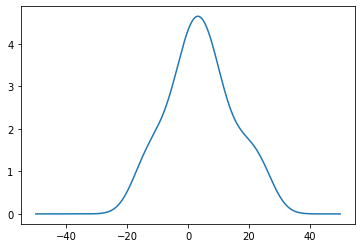

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# ピークの幅
peak_width = 5
# ピークの数
n_peaks = 10
# ピークの分散
peak_variance = 10

# ピークの位置をランダムに生成
peak_positions = np.random.normal(0, peak_variance, n_peaks)

# データを生成
x = np.arange(-50, 50, 0.1)
y = np.zeros(len(x))

for i in range(n_peaks):
    y += np.exp(-(x - peak_positions[i])**2 / (2 * peak_width**2))

# 図を表示
plt.plot(x, y)
plt.show()

In [6]:

import scipy.optimize

# 初期値を生成する関数
def initial_guess(x, y):
    # 最大値の位置を検出
    max_index = np.argmax(y)
    peak_position = x[max_index]
    # 最大値から左右にそれぞれ半分の幅で切り取る
    half_width = (x[-1] - x[0]) / (2 * len(x))
    x_left = x[x < peak_position]
    y_left = y[x < peak_position]
    x_right = x[x > peak_position]
    y_right = y[x > peak_position]
    # 左右のデータから、それぞれ最大値を持つ点を検出
    left_max_index = np.argmax(y_left)
    right_max_index = np.argmax(y_right)
    left_peak_position = x_left[left_max_index]
    right_peak_position = x_right[right_max_index]
    # 初期値を返す
    return left_peak_position, peak_position, right_peak_position

# ピーク位置を検出する関数
def detect_peaks(x, y):
    # 初期値を生成
    initial_values = initial_guess(x, y)
    # ピーク位置を検出
    result = scipy.optimize.curve_fit(fit_function, x, y, p0=initial_values)
    return result[0]

# フィッティング用の関数
def fit_function(x, a, b, c):
    return np.exp(-(x - a)**2 / 2) + np.exp(-(x - b)**2 / 2) + np.exp(-(x - c)**2 / 2)

# データを生成
x = np.arange(-50, 50, 0.1)
y = np.zeros(len(x))

# 3つのピークを重ねあわせる
y += np.exp(-(x - 15)**2 / 2)
y += np.exp(-(x + 15)**2 / 2)
y += np.exp(-(x + 45)**2 / 2)

# ピーク位置を検出
peak_positions = detect_peaks(x, y)

# 結果を表示
print(peak_positions)

[-45.96141954 -44.03870933 -15.        ]


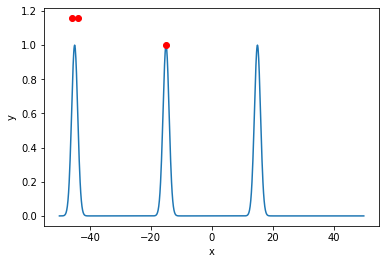

In [8]:

# プロットを準備
fig, ax = plt.subplots()

# データをプロット
ax.plot(x, y)

# ピーク位置をプロット
for position in peak_positions:
    ax.plot(position, fit_function(position, *peak_positions), 'o', color='red')

# 軸のラベルを設定
ax.set_xlabel('x')
ax.set_ylabel('y')

# グラフを表示
plt.show()